In [74]:
import yfinance as yf
import pandas as pd

In [75]:
# Define the ticker and date range
ticker = "GC=F"
start_date = "2000-01-01"
end_date = None  # None will fetch data till today

# Download the data
gold = yf.Ticker(ticker)
gold_data = gold.history(start=start_date, end=end_date)

# Display the data as a table
print(gold_data.to_string())

                                  Open         High          Low        Close  Volume  Dividends  Stock Splits
Date                                                                                                          
2000-08-30 00:00:00-04:00   273.899994   273.899994   273.899994   273.899994       0        0.0           0.0
2000-08-31 00:00:00-04:00   274.799988   278.299988   274.799988   278.299988       0        0.0           0.0
2000-09-01 00:00:00-04:00   277.000000   277.000000   277.000000   277.000000       0        0.0           0.0
2000-09-05 00:00:00-04:00   275.799988   275.799988   275.799988   275.799988       2        0.0           0.0
2000-09-06 00:00:00-04:00   274.200012   274.200012   274.200012   274.200012       0        0.0           0.0
2000-09-07 00:00:00-04:00   274.000000   274.000000   274.000000   274.000000     125        0.0           0.0
2000-09-08 00:00:00-04:00   273.299988   273.299988   273.299988   273.299988       0        0.0           0.0
2

In [76]:
gold_data.to_csv("gold_price_history.csv")

In [77]:
df = pd.read_csv("gold_price_history.csv")

In [78]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-08-30 00:00:00-04:00,273.899994,273.899994,273.899994,273.899994,0,0.0,0.0
1,2000-08-31 00:00:00-04:00,274.799988,278.299988,274.799988,278.299988,0,0.0,0.0
2,2000-09-01 00:00:00-04:00,277.000000,277.000000,277.000000,277.000000,0,0.0,0.0
3,2000-09-05 00:00:00-04:00,275.799988,275.799988,275.799988,275.799988,2,0.0,0.0
4,2000-09-06 00:00:00-04:00,274.200012,274.200012,274.200012,274.200012,0,0.0,0.0


In [79]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6307,2025-10-20 00:00:00-04:00,4244.100098,4356.600098,4214.600098,4336.399902,1750,0.0,0.0
6308,2025-10-21 00:00:00-04:00,4332.700195,4332.700195,4087.699951,4087.699951,2943,0.0,0.0
6309,2025-10-22 00:00:00-04:00,4109.700195,4148.500000,4006.000000,4044.399902,1237,0.0,0.0
6310,2025-10-23 00:00:00-04:00,4078.399902,4136.799805,4070.699951,4125.500000,1237,0.0,0.0
6311,2025-10-24 00:00:00-04:00,4144.000000,4159.000000,4096.100098,4107.100098,76094,0.0,0.0


In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [82]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [83]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [84]:
df['Dividends'].value_counts()

Dividends
0.0    6312
Name: count, dtype: int64

In [85]:
df['Stock Splits'].value_counts()

Stock Splits
0.0    6312
Name: count, dtype: int64

In [86]:
df.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [87]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [88]:
df['Date']

0       2000-08-30 00:00:00-04:00
1       2000-08-31 00:00:00-04:00
2       2000-09-01 00:00:00-04:00
3       2000-09-05 00:00:00-04:00
4       2000-09-06 00:00:00-04:00
                  ...            
6307    2025-10-20 00:00:00-04:00
6308    2025-10-21 00:00:00-04:00
6309    2025-10-22 00:00:00-04:00
6310    2025-10-23 00:00:00-04:00
6311    2025-10-24 00:00:00-04:00
Name: Date, Length: 6312, dtype: object

In [89]:
df['Date'].dtype

dtype('O')

In [93]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [90]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\Owner\AppData\Local\Temp\ipykernel_5532\2263964175.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [91]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

AttributeError: Can only use .dt accessor with datetimelike values

In [92]:
df['Date'] = df['Date'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [95]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [96]:
df['Date']

0      2000-08-30
1      2000-08-31
2      2000-09-01
3      2000-09-05
4      2000-09-06
          ...    
6307   2025-10-20
6308   2025-10-21
6309   2025-10-22
6310   2025-10-23
6311   2025-10-24
Name: Date, Length: 6312, dtype: datetime64[ns]

In [25]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [41]:
df

,Date,Open,High,Low,Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
6302,2025-10-13,4016.000000,4111.000000,4016.000000,4108.600098,1697
6303,2025-10-14,4131.700195,4160.100098,4085.800049,4138.700195,2424
6304,2025-10-15,4145.000000,4210.600098,4145.000000,4176.899902,3287
6305,2025-10-16,4198.799805,4307.000000,4196.600098,4280.200195,3287


In [48]:
df['Month'] = df['Date'].dt.month_name()
df['Month']

0          August
1          August
2       September
3       September
4       September
          ...    
6307      October
6308      October
6309      October
6310      October
6311      October
Name: Month, Length: 6312, dtype: object

In [43]:
df['Year'] = df['Date'].dt.year
df['Year']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
6302    2025
6303    2025
6304    2025
6305    2025
6306    2025
Name: Year, Length: 6307, dtype: int32

In [44]:
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear
df['Quarter'] = df['Date'].dt.quarter
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)
df['IsYearStart'] = df['Date'].dt.is_year_start.astype(int)
df['IsYearEnd'] = df['Date'].dt.is_year_end.astype(int)

In [45]:
df['Return'] = df['Close'].pct_change()
df['Volatility_7'] = df['Close'].rolling(7).std()
df['Volatility_30'] = df['Close'].rolling(30).std()
df['Trend_7'] = df['Close'] - df['Close'].shift(7)
df['Trend_30'] = df['Close'] - df['Close'].shift(30)

In [46]:
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag3'] = df['Close'].shift(3)
df['Close_lag7'] = df['Close'].shift(7)
df['Close_lag14'] = df['Close'].shift(14)
df['Close_lag30'] = df['Close'].shift(30)

In [47]:
df['MA_7'] = df['Close'].rolling(7).mean()
df['MA_14'] = df['Close'].rolling(14).mean()
df['MA_30'] = df['Close'].rolling(30).mean()
df['MA_60'] = df['Close'].rolling(60).mean()
df['MA_90'] = df['Close'].rolling(90).mean()
df['STD_7'] = df['Close'].rolling(7).std()
df['STD_14'] = df['Close'].rolling(14).std()
df['STD_30'] = df['Close'].rolling(30).std()

In [48]:
df['Return'] = df['Close'].pct_change()

In [49]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Month,Year,Day,DayOfWeek,...,Close_lag14,Close_lag30,MA_7,MA_14,MA_30,MA_60,MA_90,STD_7,STD_14,STD_30
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0,August,2000,30,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0,August,2000,31,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,0,September,2000,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,2,September,2000,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,0,September,2000,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000-09-07,274.000000,274.000000,274.000000,274.000000,125,September,2000,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000-09-08,273.299988,273.299988,273.299988,273.299988,0,September,2000,8,4,...,NaN,NaN,275.214281,NaN,NaN,NaN,NaN,1.868534,NaN,NaN
7,2000-09-11,273.100006,273.100006,273.100006,273.100006,0,September,2000,11,0,...,NaN,NaN,275.099997,NaN,NaN,NaN,NaN,1.983259,NaN,NaN
8,2000-09-12,272.899994,272.899994,272.899994,272.899994,0,September,2000,12,1,...,NaN,NaN,274.328570,NaN,NaN,NaN,NaN,1.529394,NaN,NaN
9,2000-09-13,272.799988,272.799988,272.799988,272.799988,0,September,2000,13,2,...,NaN,NaN,273.728568,NaN,NaN,NaN,NaN,1.057850,NaN,NaN


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Month', 'Year',
       'Day', 'DayOfWeek', 'DayOfYear', 'Quarter', 'IsMonthStart',
       'IsMonthEnd', 'IsYearStart', 'IsYearEnd', 'Return', 'Volatility_7',
       'Volatility_30', 'Trend_7', 'Trend_30', 'Close_lag1', 'Close_lag3',
       'Close_lag7', 'Close_lag14', 'Close_lag30', 'MA_7', 'MA_14', 'MA_30',
       'MA_60', 'MA_90', 'STD_7', 'STD_14', 'STD_30'],
      dtype='object')

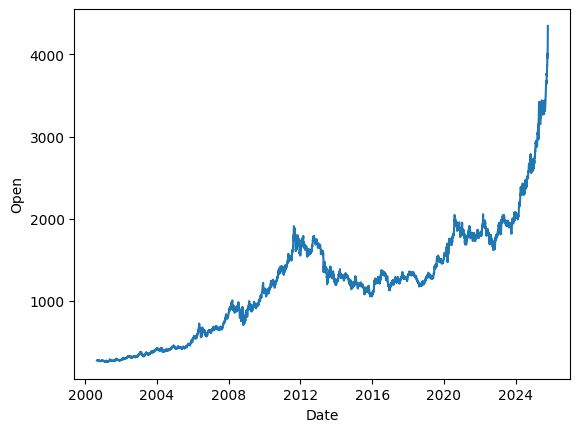

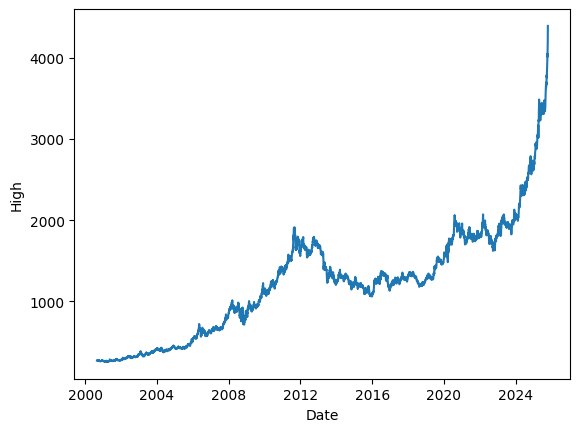

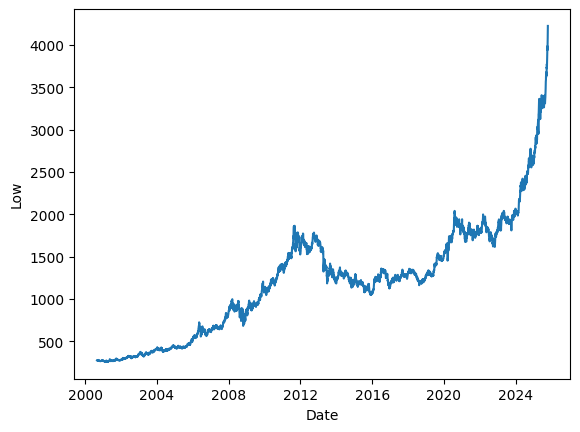

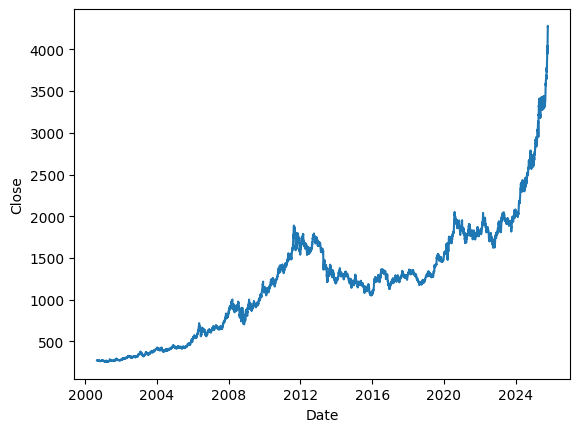

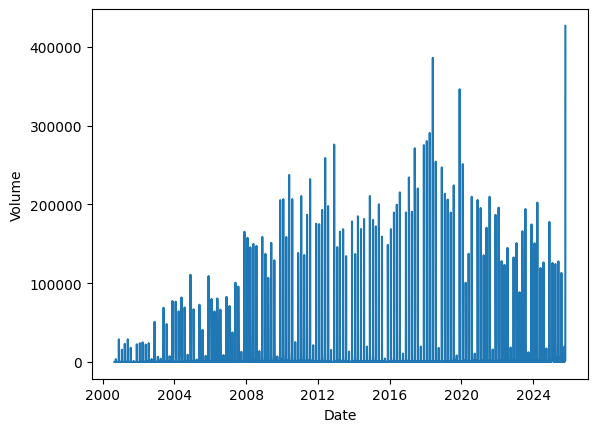

In [52]:
col = ['Open', 'High', 'Low', 'Close', 'Volume']
for c in col:
    sns.lineplot(x = df['Date'], y = df[c])
    plt.show()

In [53]:
df['Month'].value_counts()

Month
October      564
August       556
March        544
May          530
June         528
September    528
July         528
December     522
April        517
January      507
November     504
February     479
Name: count, dtype: int64

In [54]:
df['Month'] = df['Month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [55]:
df['Month'].value_counts()

Month
10    564
8     556
3     544
5     530
6     528
9     528
7     528
12    522
4     517
1     507
11    504
2     479
Name: count, dtype: int64

In [56]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Month,Year,Day,DayOfWeek,...,Close_lag14,Close_lag30,MA_7,MA_14,MA_30,MA_60,MA_90,STD_7,STD_14,STD_30
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0,8,2000,30,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0,8,2000,31,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,0,9,2000,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,2,9,2000,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,0,9,2000,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000-09-07,274.000000,274.000000,274.000000,274.000000,125,9,2000,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000-09-08,273.299988,273.299988,273.299988,273.299988,0,9,2000,8,4,...,NaN,NaN,275.214281,NaN,NaN,NaN,NaN,1.868534,NaN,NaN
7,2000-09-11,273.100006,273.100006,273.100006,273.100006,0,9,2000,11,0,...,NaN,NaN,275.099997,NaN,NaN,NaN,NaN,1.983259,NaN,NaN
8,2000-09-12,272.899994,272.899994,272.899994,272.899994,0,9,2000,12,1,...,NaN,NaN,274.328570,NaN,NaN,NaN,NaN,1.529394,NaN,NaN
9,2000-09-13,272.799988,272.799988,272.799988,272.799988,0,9,2000,13,2,...,NaN,NaN,273.728568,NaN,NaN,NaN,NaN,1.057850,NaN,NaN


In [57]:
df.shape

(6307, 34)

In [58]:
df.isna().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
Month             0
Year              0
Day               0
DayOfWeek         0
DayOfYear         0
Quarter           0
IsMonthStart      0
IsMonthEnd        0
IsYearStart       0
IsYearEnd         0
Return            1
Volatility_7      6
Volatility_30    29
Trend_7           7
Trend_30         30
Close_lag1        1
Close_lag3        3
Close_lag7        7
Close_lag14      14
Close_lag30      30
MA_7              6
MA_14            13
MA_30            29
MA_60            59
MA_90            89
STD_7             6
STD_14           13
STD_30           29
dtype: int64

In [59]:
df1 = df.dropna()
df1.shape

(6218, 34)

In [60]:
df1['Volume'] = (df1['Volume'] - df1['Volume'].min()) / (df1['Volume'].max() - df1['Volume'].min())

In [61]:
df1.shape

(6218, 34)

In [62]:
df1.to_csv('gold_data.csv')